In [1]:
import numpy as np
import tensorflow as tf
from collections import deque
import time
import random
from tqdm import tqdm
import os
from PIL import Image
import cv2
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from gym import spaces
import pygame

import matplotlib.pylab as plt
from IPython import display
%matplotlib inline


from GridEnv import GridWorld
from Agent import NeuralQLearningAgent
from render_controller import initialize_game

In [2]:
def plot_rewards(rewards):
    plt.figure(figsize=(14,6))
    plt.plot(rewards)
    display.display(plt.gcf())
    display.clear_output(wait=True)

    
def run_agent_in_env(env, agent, episodes, learning=False, plot=False, render=False, plot_interval=1000):
    rewards = []
    for episode in range(episodes):
        game_already_initialized = False
        observation = env.reset()
        total_reward = 0
        done = False
        while not done :
            if render:
                if not game_already_initialized:
                    surface=initialize_game()
                    game_already_initialized = True  
                env.render(surface)
            action = agent.get_action(observation, learning)
            
            # Wykonajmy akcje
            next_observation, reward, done, _ = env.step(action)
            total_reward += reward
            
            # Jeśli się uczymy, przekażmy przejście do agenta
            if learning:
                agent.process_transition(observation, action, reward, next_observation, done)
            
            observation = next_observation
        if render:
            pygame.quit()
        rewards.append(total_reward)
        
        # Wyświetl na wykresie nagrody otrzymane po kolei w epizodach
        if plot and episode % plot_interval == 0:
            plot_rewards(rewards)
    return rewards    

In [3]:
env = GridWorld(9, 9, 2) #gym.make("LunarLander-v2")

In [6]:
agent = NeuralQLearningAgent(env,0.99,1,0.0001,[81],batch_size=64,n_actions=4,update_every=20,
                             useReplay_mem=True,useNetwork_freezing=True,useDouble_Qlearning=True)

KeyboardInterrupt: 

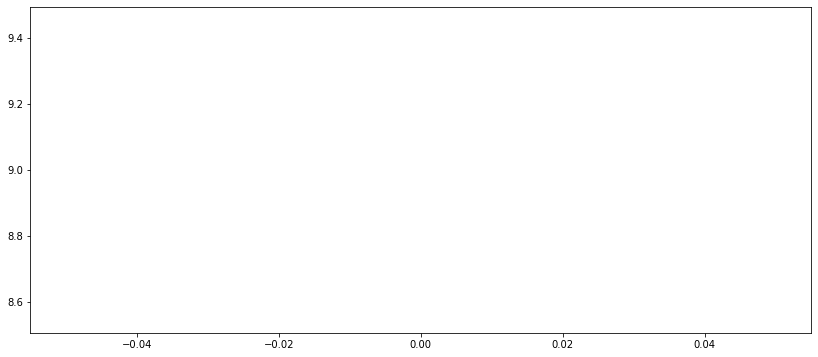

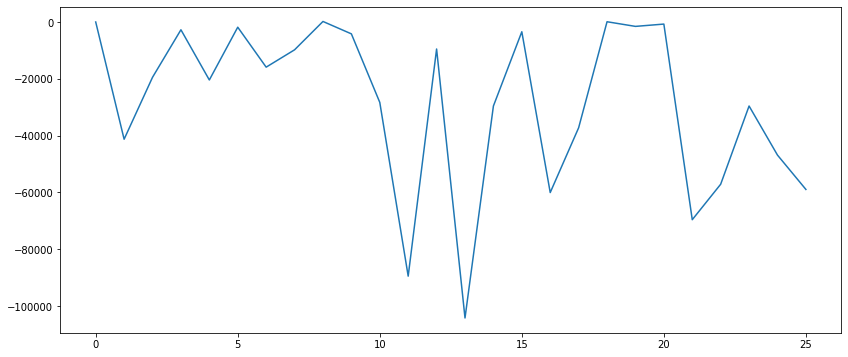

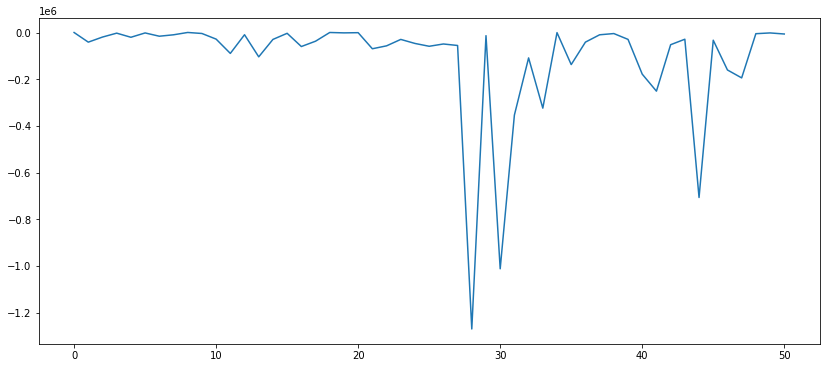

In [7]:
rewards = run_agent_in_env(env, agent, 300, learning=True, plot=True, render=False, plot_interval=25)

In [12]:
# SAVE MODEL TO FILE
T.save(agent.q_eval, "./model")

In [4]:
# LOAD THE MODEL FROM FILE
model=T.load("./model")

In [5]:
agent = NeuralQLearningAgent(env,0.99,1,0.0001,[9],batch_size=64,n_actions=4,update_every=20,
                             useReplay_mem=True,useNetwork_freezing=True,useDouble_Qlearning=True,q_eval=model)

/mnt/c/Users/mikol/Desktop/Sem10/AI_in_games/AIGames/Agent.py:100: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.terminal_memory = np.zeros(self.mem_size, dtype=np.bool)


In [ ]:
rewards = run_agent_in_env(env, agent,1, learning=False, plot=False, render=True, plot_interval=20)

------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------
------------------------------------------


In [ ]:
import pygame
pygame.display.flip()

In [7]:
pygame.quit()

In [20]:
env.reset()

array([1., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
env.foodPosition=19

In [10]:
env.reset()

array([0., 0., 0., 0., 1., 0., 0., 0., 2.])